Frequency assignment for each cell:
Cell 1 → Frequency 1
Cell 2 → Frequency 2
Cell 3 → Frequency 3
Cell 4 → Frequency 1
Cell 5 → Frequency 2
Cell 6 → Frequency 3


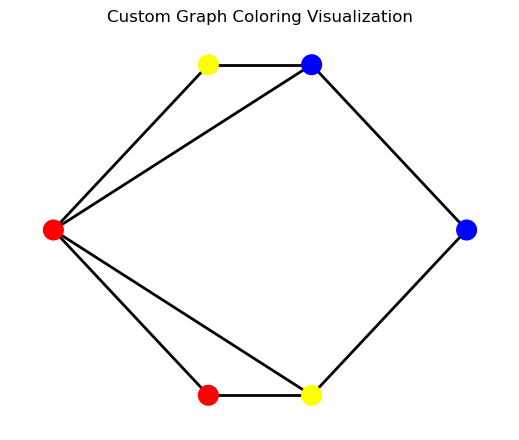

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

def is_safe(vertex, color, graph, colors):
    """Checks if assigning 'color' to 'vertex' is safe (i.e., no adjacent vertex has the same color)."""
    for i in range(len(graph)):
        if graph[vertex][i] == 1 and colors[i] == color:
            return False
    return True

def graph_coloring_util(graph, m, colors, vertex):
    """The recursive backtracking utility function."""
    if vertex == len(graph):
        return True 
    
    for c in range(1, m + 1):
        if is_safe(vertex, c, graph, colors):
            colors[vertex] = c
            if graph_coloring_util(graph, m, colors, vertex + 1):
                return True
            colors[vertex] = 0 
    return False

def graph_coloring(graph, m):
    """Main function to solve the graph coloring problem."""
    colors = [0] * len(graph)
    if not graph_coloring_util(graph, m, colors, 0):
        print("No solution exists with given number of frequencies.")
        return
    
    print("Frequency assignment for each cell:")
    for idx, color in enumerate(colors):
        print(f"Cell {idx+1} → Frequency {color}")
    visualize_graph(graph, colors)

def visualize_graph(graph, colors):
    """Visualizes the graph using networkx with the custom hexagonal layout."""
    G = nx.Graph()
    n = len(graph)
    for i in range(n):
        for j in range(i, n):
            if graph[i][j] == 1:
                G.add_edge(i, j)
    pos = {
        0: (0, 0),      
        1: (1.5, 1.5),  
        2: (2.5, 1.5),  
        3: (4, 0),      
        4: (1.5, -1.5), 
        5: (2.5, -1.5)  
    }
    color_map = ['red', 'yellow', 'blue', 'orange', 'purple', 'cyan'] 
    node_colors = [color_map[c-1] if c > 0 else 'gray' for c in colors]
    plt.figure(figsize=(5,4)) 
    nx.draw(G, pos, 
            with_labels=False, 
            node_color=node_colors, 
            node_size=200, 
            width=2.0,
            font_size=12)
    plt.title("Custom Graph Coloring Visualization")
    plt.axis('off')
    plt.show()

graph = [
    [0, 1, 1, 0, 1, 1], 
    [1, 0, 1, 0, 0, 0], 
    [1, 1, 0, 1, 0, 0], 
    [0, 0, 1, 0, 0, 1], 
    [1, 0, 0, 0, 0, 1], 
    [1, 0, 0, 1, 1, 0]  
]
m = 3 
graph_coloring(graph, m)